# YZV 211E 
# Homework 1 
### Prepared by Res. Asst. Yaren Yılmaz
yilmazy20@itu.edu.tr

In the world of AI, the ability to access and manipulate data from various sources is a fundamental skill. This assignment is designed to give you hands-on experience in working with Application Programming Interfaces (APIs), which allow different software systems to interact and share information. You will be tasked with obtaining data from two public APIs, applying data transformation techniques to filter and process the received information, and finally, visualizing the results.
<p align="center">
  <img src="https://rapidapi.com/blog/wp-content/uploads/2023/03/What-is-an-API-definition.webp" width="600" height="400" alt="convert notebook to web app">
</p>

**Don't forget to leave comments in the notebook. Print the necessary outputs at each stage in your code. Assignments without necessary outputs and comments will be deducted points.**

In [425]:
# You can use the following libraries if you need them.
import requests
from datetime import datetime, timedelta

import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pytz

### What is Kraken API ?

The Kraken Public REST API is a part of the Kraken cryptocurrency exchange's API suite that provides access to publicly available market data and information without requiring user authentication. Here's a brief summary of the key features of the Kraken Public REST API:

1. **Market Data**: The API allows users to access a wide range of market data, including order book snapshots, recent trade history, and historical OHLCV (Open/High/Low/Close/Volume) data for various cryptocurrency trading pairs.

2. **Asset Information**: Users can retrieve information about available cryptocurrency assets, their trading pairs, and other details related to the exchange's offerings.

3. **Ticker Information**: The API provides real-time and historical price ticker information for trading pairs on Kraken.

4. **Time Information**: Developers can access the current time on the Kraken server, which is useful for synchronizing their applications with the exchange.

5. **Supported Pairs**: Kraken supports a wide range of cryptocurrency pairs and trading instruments, and the Public REST API enables users to query the available pairs and their details.

6. **Rate Limiting**: Kraken imposes rate limits on API requests to prevent abuse and ensure fair usage of their resources. These rate limits are important to keep in mind when using the API.


### Part 1: Get BTC Data from REST API 25p

In this part, you will use [Get OHCL Data Public Endpoint](https://docs.kraken.com/rest/#tag/Market-Data/operation/getOHLCData). The goal is receiving hourly BTC price and volume data. Define the pair as 'XXBTZUSD'.
* Show the data.

   
The Documentation shows:
* Query Parameter
* Response Schema
* Request Sample
* Response Sample

In [426]:
from datetime import datetime, timezone

url = 'https://api.kraken.com/0/public/OHLC'

def get_btc_data_between_dates(url, start_date, end_date, pair='XXBTZUSD'):
    # Convert dates to timestamps
    offset = timedelta(hours=3)
    custom_timezone = timezone(offset)
    start_timestamp = datetime.strptime(start_date,'%B %d, %Y %H:%M:%S').replace(tzinfo=custom_timezone).timestamp()
    end_timestamp = datetime.strptime(end_date,'%B %d, %Y %H:%M:%S').replace(tzinfo=custom_timezone).timestamp()

    params = {
        'pair': pair,
        'interval': 60,        # 1 hour intervals
        'since': start_timestamp,
        'until': end_timestamp
    }

    response = requests.get(url, params=params)
    data = response.json()
    ohlc_data = data['result'][pair]
    return ohlc_data

### Part 2: BTC Data to Pandas Dataframe & Filtering 25p

You should complete some tasks using [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) . After receiving the BTC data using API, it is expected to filter the dataset by date. The dataset should include price values only between times 'October 10, 2023 00\:00\:00' and 'October 17, 2023 20\:00\:00'.

After that, we need to find the hours with the highest price increase and the hours with the highest price decrease. Price change can be calculated as the difference between the closing and opening prices for the given time.

* For example if open=10 and close=20 for one hour, it means the price increasing. The price change is calculated as 20-10=10.
* If open=10 and close=5 for one hour, it means the price descreasing. The price change is calculated as 5-10=-5.


* Show the hours you found.

Check [Responses](https://docs.kraken.com/rest/#tag/Market-Data/operation/getOHLCData) for meaningful column names.


In [427]:
btc_data_october = get_btc_data_between_dates(url=url, start_date='October 10, 2023 00:00:00', end_date='October 17, 2023 20:00:00')
df = pd.DataFrame(btc_data_october, columns=['time', 'open', 'high', 'low', 'close', 'vwap', 'volume', 'count'])
df.set_index('time', inplace=True)
df.sort_index(inplace=True)
df.index = pd.to_datetime(df.index, unit='s')
df['price change'] = df['close'].astype(float) - df['open'].astype(float)
df


,open,high,low,close,vwap,volume,count,price change
time,,,,,,,,
2023-11-03 15:00:00,34727.4,34859.1,34717.3,34810.0,34800.9,90.75989821,1516,82.6
2023-11-03 16:00:00,34810.0,34833.0,34620.1,34659.9,34721.9,78.24727951,1441,-150.1
2023-11-03 17:00:00,34659.8,34692.2,34358.8,34448.0,34497.5,137.03275178,1507,-211.8
2023-11-03 18:00:00,34448.0,34623.4,34387.5,34555.1,34465.1,99.74148055,1343,107.1
2023-11-03 19:00:00,34555.1,34596.1,34453.3,34545.7,34523.6,39.07375939,1060,-9.4
...,...,...,...,...,...,...,...,...
2023-12-03 10:00:00,39461.2,39544.4,39444.7,39542.6,39483.0,28.20658457,589,81.4
2023-12-03 11:00:00,39542.6,39543.6,39483.1,39490.2,39513.0,30.29118315,613,-52.4
2023-12-03 12:00:00,39490.2,39499.2,39404.6,39413.9,39448.4,28.07546719,664,-76.3


In [428]:
df_high = df['price change'].sort_values(ascending=False).head(30)
df_low = df['price change'].sort_values(ascending=True).head(30)

In [429]:
df_high

time
2023-11-15 18:00:00    910.2
2023-11-09 14:00:00    689.3
2023-11-22 18:00:00    647.6
2023-12-02 19:00:00    537.1
2023-11-07 18:00:00    533.9
2023-11-17 17:00:00    520.3
2023-11-24 15:00:00    455.4
2023-11-09 02:00:00    427.5
2023-11-19 23:00:00    406.5
2023-12-01 16:00:00    381.6
2023-12-01 09:00:00    381.1
2023-11-21 15:00:00    374.0
2023-11-15 11:00:00    366.7
2023-11-28 16:00:00    355.4
2023-11-20 17:00:00    341.7
2023-11-04 22:00:00    338.5
2023-11-28 17:00:00    335.1
2023-11-05 22:00:00    332.9
2023-11-20 14:00:00    320.8
2023-11-22 00:00:00    317.9
2023-11-22 20:00:00    316.3
2023-11-10 16:00:00    314.2
2023-11-10 11:00:00    314.1
2023-11-27 16:00:00    300.2
2023-12-03 13:00:00    288.3
2023-11-09 13:00:00    286.8
2023-11-14 21:00:00    282.1
2023-11-08 18:00:00    280.5
2023-11-15 15:00:00    277.1
2023-11-09 04:00:00    268.8
Name: price change, dtype: float64

In [430]:
df_low

time
2023-11-14 18:00:00   -843.4
2023-11-09 15:00:00   -790.4
2023-11-09 16:00:00   -719.8
2023-11-21 23:00:00   -615.2
2023-11-24 16:00:00   -508.1
2023-11-21 22:00:00   -453.5
2023-11-14 15:00:00   -445.0
2023-11-21 14:00:00   -382.0
2023-11-16 01:00:00   -357.4
2023-11-16 13:00:00   -355.9
2023-11-05 21:00:00   -354.7
2023-11-17 14:00:00   -341.0
2023-11-16 19:00:00   -333.3
2023-11-29 10:00:00   -328.8
2023-11-29 14:00:00   -322.2
2023-11-13 21:00:00   -311.8
2023-11-16 15:00:00   -298.5
2023-11-27 10:00:00   -293.9
2023-11-05 13:00:00   -292.8
2023-11-14 00:00:00   -279.1
2023-11-21 17:00:00   -276.8
2023-11-28 21:00:00   -275.7
2023-11-16 17:00:00   -269.4
2023-11-09 18:00:00   -260.1
2023-11-23 15:00:00   -257.1
2023-11-14 09:00:00   -255.9
2023-11-22 14:00:00   -249.1
2023-11-11 01:00:00   -241.4
2023-11-13 03:00:00   -239.8
2023-11-10 13:00:00   -239.6
Name: price change, dtype: float64

<Axes: ylabel='time'>

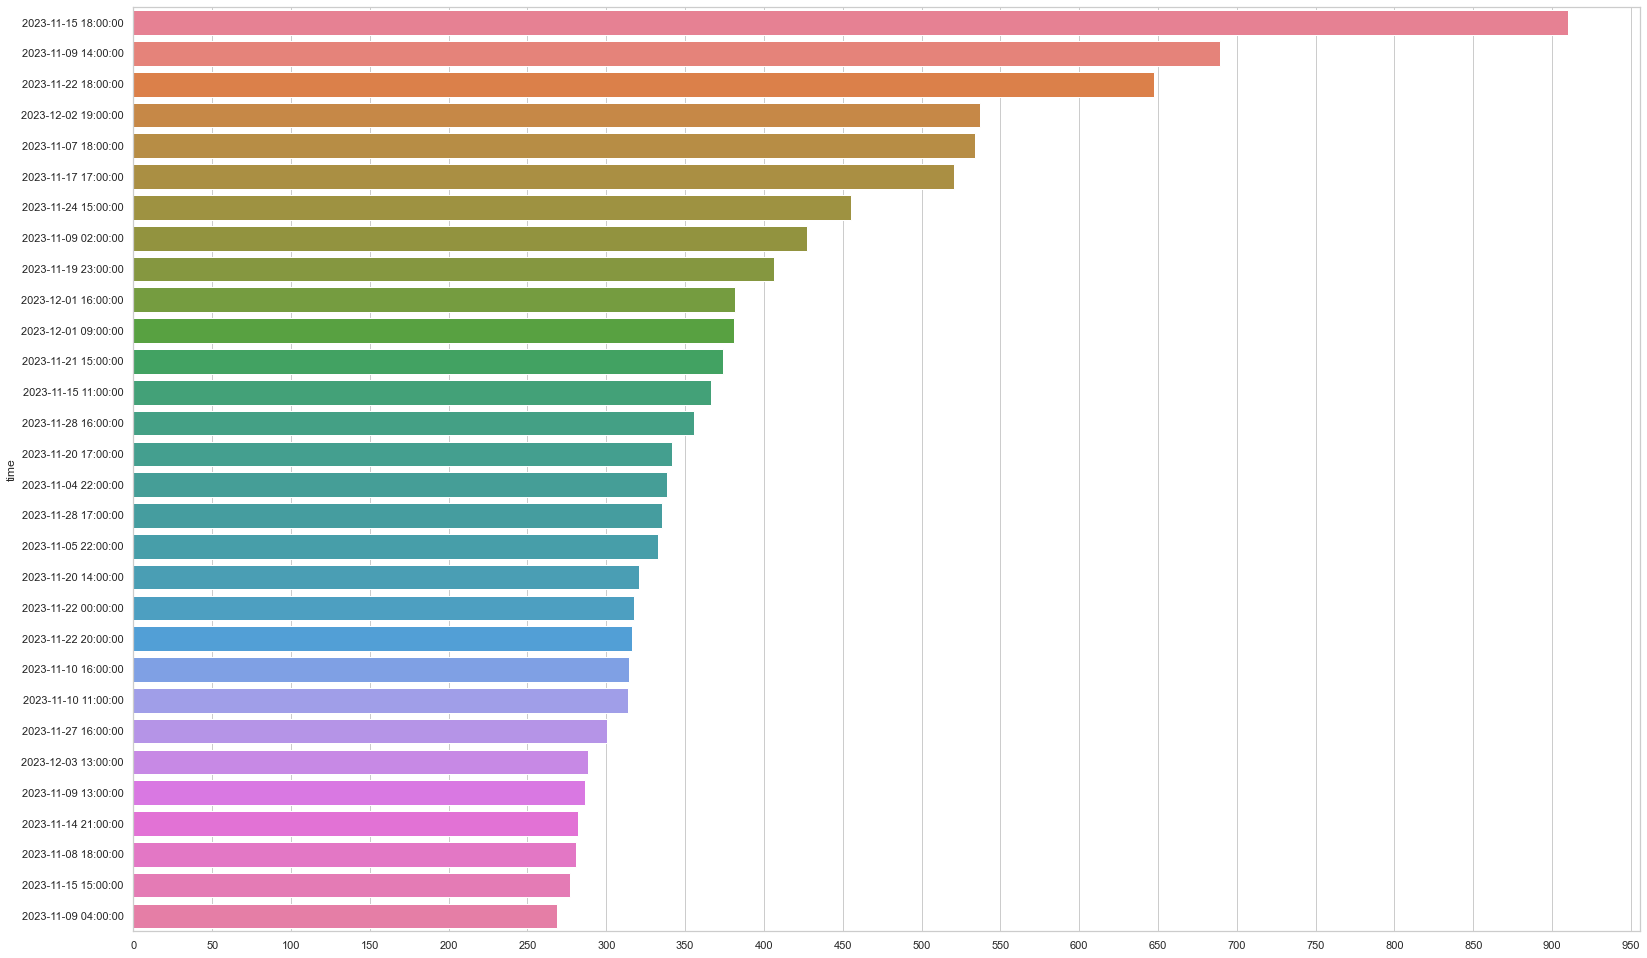

In [431]:
sn.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(27, 17))
plt.xticks(list(range(0, 951, 50)))
sn.barplot(ax=ax, y=df_high.keys(), x=df_high.values, width=0.8, hue=df_high.keys())

<Axes: ylabel='time'>

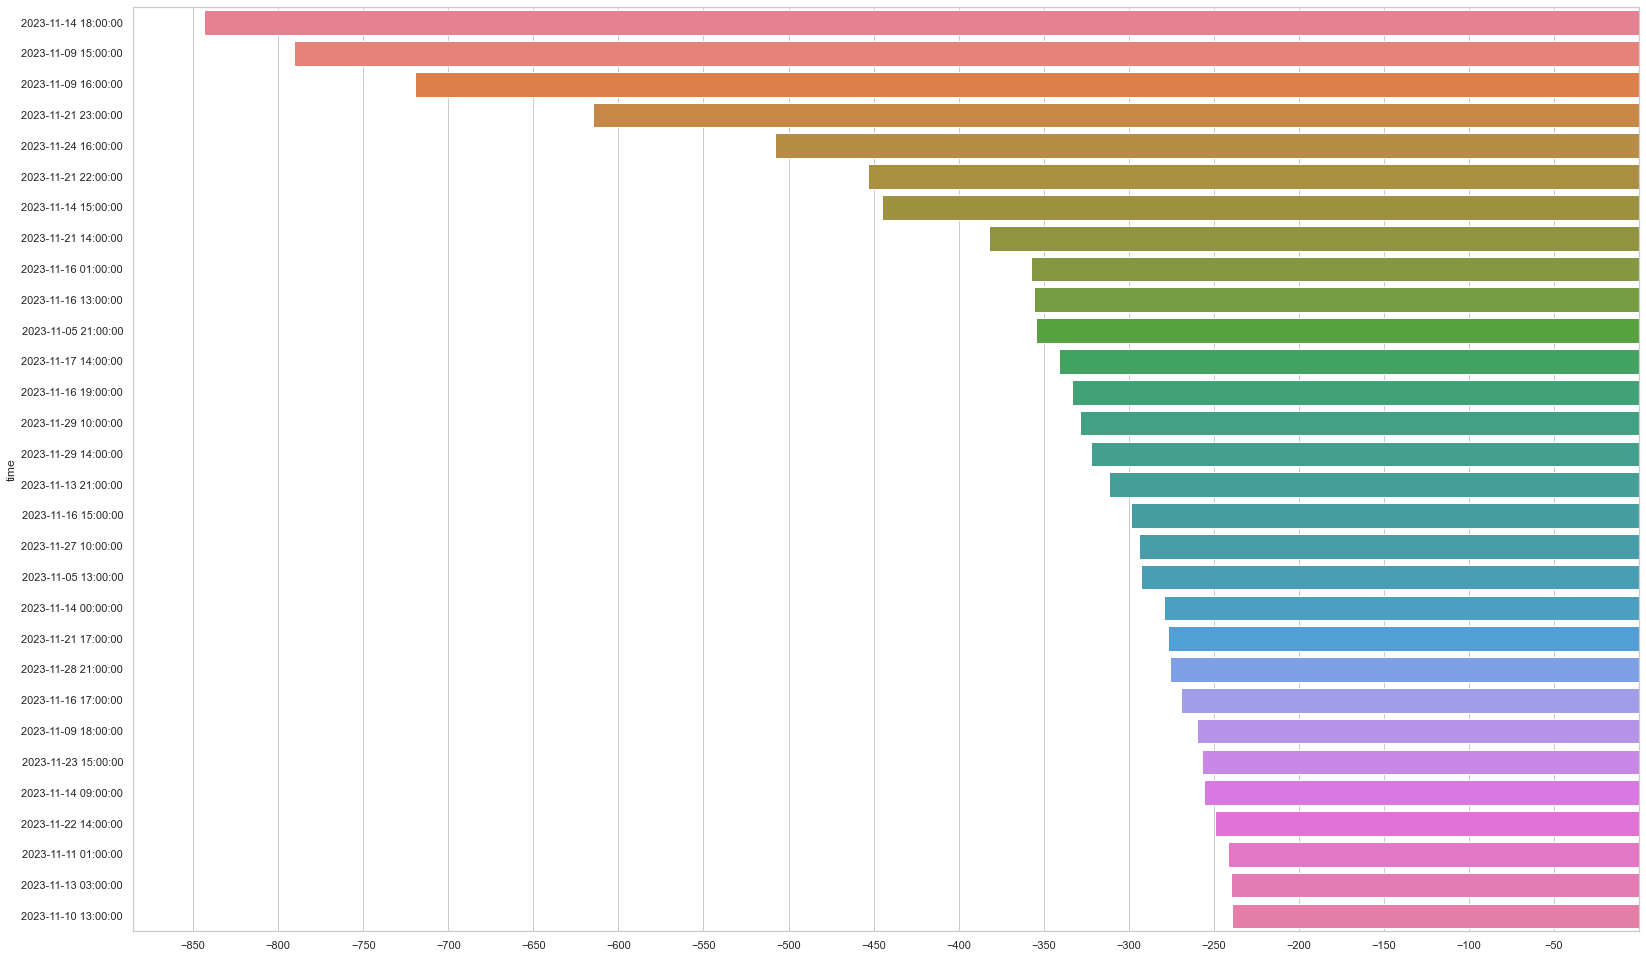

In [432]:
fig, ax = plt.subplots(figsize=(27, 17))
plt.xticks(list(range(-1000, 0, 50)))
sn.barplot(ax=ax, y=df_low.keys(), x=df_low.values, width=0.8, hue=df_low.keys())

### Part 3: Get Trade Data from REST API 25p

Now, we have two timestamp values of the highest price changes. We want to analyze these hours in more detail by looking their trades. You will use the public endpoint called [Get Recent Trade](https://docs.kraken.com/rest/#tag/Market-Data/operation/getRecentTrades). You should find all the trades within the selected hours, that you have already found in Part 2.
* For example if selected_ts=1697500800 (dt = '2023-10-17 00\:00\:00'), you should include all the trades between '2023-10-17 00\:00\:00'  and '2023-10-17 01\:00\:00'.
* Show the trade data.

**Note:** The first few trades after 1 hour can be ignored, because it depends on the 'count' parameter you choose.

In [433]:
def get_recent_trades(since, until, url="https://api.kraken.com/0/public/Trades", pair = 'XXBTZUSD', timezone = 'Turkey'):
    tz = pytz.timezone(timezone)
    start_timestamp = int(datetime.strptime(since, '%Y-%m-%d %H:%M:%S').replace(tzinfo=tz).timestamp())
    end_timestamp = int(datetime.strptime(until, '%Y-%m-%d %H:%M:%S').replace(tzinfo=tz).timestamp())
    
    params = {
        'pair': pair,
        'since': start_timestamp,
        'until': end_timestamp,
    }
    
    response = requests.get(url, params=params)
    data = response.json()
    recent_data = data['result'][pair]
    return recent_data


In [434]:
data1 = get_recent_trades("2023-11-15 18:00:00", "2023-11-15 19:00:00")
high_recent_trade_df = pd.DataFrame(data=data1, columns=["Price", "Volume", "Time", "Buy/Sell Indicator", "Market/Limit Indicator", "Miscellaneous Information", "Trade ID"])
high_recent_trade_df


,Price,Volume,Time,Buy/Sell Indicator,Market/Limit Indicator,Miscellaneous Information,Trade ID
0,36527.40000,0.00176849,1.700064e+09,b,l,,64419630
1,36544.30000,0.01000000,1.700064e+09,s,m,,64419631
2,36544.30000,0.12682024,1.700064e+09,s,m,,64419632
3,36544.30000,0.07670313,1.700064e+09,s,m,,64419633
4,36544.40000,0.00217107,1.700064e+09,b,m,,64419634
...,...,...,...,...,...,...,...
995,36389.10000,0.00100000,1.700066e+09,s,l,,64420625
996,36389.10000,0.00010453,1.700066e+09,s,l,,64420626
997,36389.10000,0.00289260,1.700066e+09,s,l,,64420627
998,36389.20000,0.00109922,1.700066e+09,b,l,,64420628


In [435]:
data2 = get_recent_trades("2023-11-14 18:00:00", "2023-11-14 19:00:00")
low_recent_trade_df = pd.DataFrame(data=data2, columns=["Price", "Volume", "Time", "Buy/Sell Indicator", "Market/Limit Indicator", "Miscellaneous Information", "Trade ID"])
low_recent_trade_df

,Price,Volume,Time,Buy/Sell Indicator,Market/Limit Indicator,Miscellaneous Information,Trade ID
0,36155.50000,0.00178971,1.699978e+09,b,l,,64383610
1,36155.40000,0.00100000,1.699978e+09,s,l,,64383611
2,36155.40000,0.00165000,1.699978e+09,s,l,,64383612
3,36155.50000,0.00156182,1.699978e+09,b,m,,64383613
4,36155.50000,0.00145463,1.699978e+09,b,m,,64383614
...,...,...,...,...,...,...,...
995,36362.10000,0.04245434,1.699980e+09,b,m,,64384605
996,36362.10000,0.06875044,1.699980e+09,b,m,,64384606
997,36362.10000,0.00145363,1.699980e+09,b,l,,64384607
998,36362.10000,0.00040642,1.699980e+09,b,l,,64384608


### Part 4: Trade Data to Pandas Dataframe & Analysis 25p

In the last part, it is expected to visualize your result. We want to see how the average volume of hours, with the highest price increase and highest price decrease, differ in buying and selling transactions. You should use bar plot where 'x' axis should represent the unique values of 'buy/sell' column and 'y' axis should represent the mean of volume.

In the end, you should obtain two different bar plots. One for the highest increase and one for the the highest decrease.

Check [Responses](https://docs.kraken.com/rest/#tag/Market-Data/operation/getRecentTrades) for meaningful column names.


TypeError: 'str' object is not callable

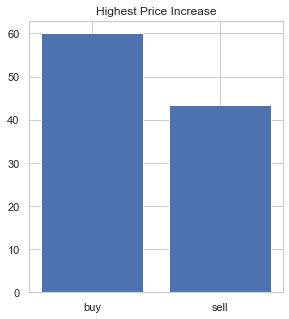

In [436]:
import pandas as pd
import matplotlib.pyplot as plt

# Önce verileri işleyin ve gerekli hesaplamaları yapın
# (Yukarıda bahsedilen "highest price increase" ve "highest price decrease" kriterlerine göre)

# Örnek DataFrame oluşturun (bu verileri kendi verilerinizle değiştirin)
data = {
    "Price": [100, 110, 90, 120, 80],
    "Volume": [50, 60, 40, 70, 30],
    "Buy/Sell Indicator": ["buy", "sell", "sell", "buy", "sell"]
}

df = pd.DataFrame(data)

# "buy/sell" sütununa göre gruplandırma yapın ve ortalama hacmi hesaplayın
average_volume_by_transaction_type = df.groupby("Buy/Sell Indicator")["Volume"].mean()

# En yüksek fiyat artışı ve en yüksek fiyat düşüşü için iki farklı DataFrame oluşturun
# (Bu kısmı gerekli hesaplamalara göre uyarlamalısınız)

# Bar plotları oluşturun
plt.figure(figsize=(10, 5))

# En yüksek fiyat artışı için
plt.subplot(1, 2, 1)
plt.bar(average_volume_by_transaction_type.index, average_volume_by_transaction_type)

plt.title("Highest Price Increase")
plt.xlabel("Transaction Type (Buy/Sell)")
plt.ylabel("Mean Volume")

# En yüksek fiyat düşüşü için
plt.subplot(1, 2, 2)
plt.bar(average_volume_by_transaction_type.index, average_volume_by_transaction_type)

plt.title("Highest Price Decrease")
plt.xlabel("Transaction Type (Buy/Sell)")
plt.ylabel("Mean Volume")

# Plotları gösterin
plt.tight_layout()
plt.show()


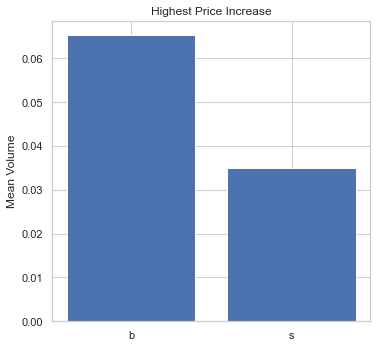

In [437]:
high_recent_trade_df['Volume'] = high_recent_trade_df['Volume'].astype(float)
average_volume_high = high_recent_trade_df.groupby('Buy/Sell Indicator')['Volume'].mean()
average_volume_high
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(average_volume_high.index, average_volume_high)
plt.title("Highest Price Increase")
plt.ylabel("Mean Volume")
plt.tight_layout()
plt.show()

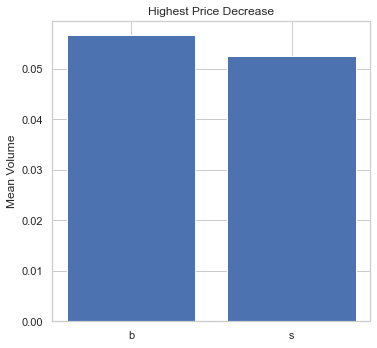

In [438]:
low_recent_trade_df['Volume'] = low_recent_trade_df['Volume'].astype(float)
average_volume_low = low_recent_trade_df.groupby('Buy/Sell Indicator')['Volume'].mean()
average_volume_low
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(average_volume_low.index, average_volume_low)
plt.title("Highest Price Decrease")
plt.ylabel("Mean Volume")
plt.tight_layout()
plt.show()